## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [3]:
import os 
print(os.getcwd()) 

C:\Users\Venkatesh K Govindan\PGP-AIML\Lab\Residency-3\External Lab


In [4]:
student_df = pd.read_csv("students-data.csv",sep=';')

In [5]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
student_df.index.name = 'number'

In [9]:
# rename column labels based on attribute information in https://archive.ics.uci.edu/ml/datasets/Student+Performance
student_df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','travel_time','study_time','failures','school_support',
          'family_support','extra_paid_classes','xtra-curricular_activities','nursery','desire_higher_edu','internet_access','in_romantic_rel','family_quality',
          'free_time','going_out','weekday_alcohol_consumption','weekend_alcohol_consumption','health_status','#_of_absences','first_period_grade','second_period_grade','final_grade']

In [10]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'travel_time', 'study_time', 'failures',
       'school_support', 'family_support', 'extra_paid_classes',
       'xtra-curricular_activities', 'nursery', 'desire_higher_edu',
       'internet_access', 'in_romantic_rel', 'family_quality', 'free_time',
       'going_out', 'weekday_alcohol_consumption',
       'weekend_alcohol_consumption', 'health_status', '#_of_absences',
       'first_period_grade', 'second_period_grade', 'final_grade'],
      dtype='object')

In [11]:
student_df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,going_out,weekday_alcohol_consumption,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


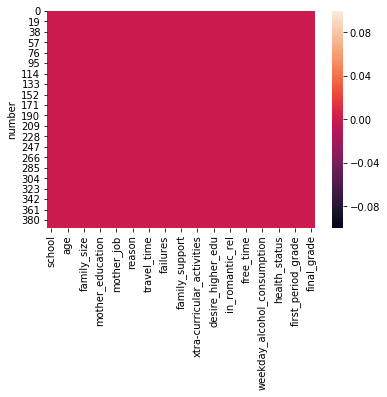

In [12]:
sns.heatmap(student_df.isnull())

## Observation: 
#### No missing values in dataset

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [13]:
student_df.select_dtypes(exclude=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
school                        395 non-null object
sex                           395 non-null object
address                       395 non-null object
family_size                   395 non-null object
parents_status                395 non-null object
mother_job                    395 non-null object
father_job                    395 non-null object
reason                        395 non-null object
guardian                      395 non-null object
school_support                395 non-null object
family_support                395 non-null object
extra_paid_classes            395 non-null object
xtra-curricular_activities    395 non-null object
nursery                       395 non-null object
desire_higher_edu             395 non-null object
internet_access               395 non-null object
in_romantic_rel               395 non-null object
dtypes: object(17)
memory usage: 52.5+ KB


In [14]:
student_df.select_dtypes(exclude=['int64']).head(10)

,school,sex,address,family_size,parents_status,mother_job,father_job,reason,guardian,school_support,family_support,extra_paid_classes,xtra-curricular_activities,nursery,desire_higher_edu,internet_access,in_romantic_rel
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [15]:
student_df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
age                            395 non-null int64
mother_education               395 non-null int64
father_education               395 non-null int64
travel_time                    395 non-null int64
study_time                     395 non-null int64
failures                       395 non-null int64
family_quality                 395 non-null int64
free_time                      395 non-null int64
going_out                      395 non-null int64
weekday_alcohol_consumption    395 non-null int64
weekend_alcohol_consumption    395 non-null int64
health_status                  395 non-null int64
#_of_absences                  395 non-null int64
first_period_grade             395 non-null int64
second_period_grade            395 non-null int64
final_grade                    395 non-null int64
dtypes: int64(16)
memory usage: 49.5 KB


In [16]:
student_df.var()

age                             1.628285
mother_education                1.198445
father_education                1.184180
travel_time                     0.486513
study_time                      0.704324
failures                        0.553017
family_quality                  0.803997
free_time                       0.997725
going_out                       1.239388
weekday_alcohol_consumption     0.793420
weekend_alcohol_consumption     1.658678
health_status                   1.932944
#_of_absences                  64.049541
first_period_grade             11.017053
second_period_grade            14.148917
final_grade                    20.989616
dtype: float64

In [17]:
student_new_df = student_df.copy()

In [18]:
student_new_df.drop(['travel_time', 'study_time', 'failures', 'family_quality', 'weekday_alcohol_consumption'], axis=1, inplace=True)

In [19]:
student_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
school                         395 non-null object
sex                            395 non-null object
age                            395 non-null int64
address                        395 non-null object
family_size                    395 non-null object
parents_status                 395 non-null object
mother_education               395 non-null int64
father_education               395 non-null int64
mother_job                     395 non-null object
father_job                     395 non-null object
reason                         395 non-null object
guardian                       395 non-null object
school_support                 395 non-null object
family_support                 395 non-null object
extra_paid_classes             395 non-null object
xtra-curricular_activities     395 non-null object
nursery                        395 non-null object
desire_higher_edu              

In [20]:
student_new_df.var()

age                             1.628285
mother_education                1.198445
father_education                1.184180
free_time                       0.997725
going_out                       1.239388
weekend_alcohol_consumption     1.658678
health_status                   1.932944
#_of_absences                  64.049541
first_period_grade             11.017053
second_period_grade            14.148917
final_grade                    20.989616
dtype: float64

In [21]:
student_new_df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,3,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,3,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,3,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,2,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,3,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [22]:
student_new_df.select_dtypes(exclude=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
school                        395 non-null object
sex                           395 non-null object
address                       395 non-null object
family_size                   395 non-null object
parents_status                395 non-null object
mother_job                    395 non-null object
father_job                    395 non-null object
reason                        395 non-null object
guardian                      395 non-null object
school_support                395 non-null object
family_support                395 non-null object
extra_paid_classes            395 non-null object
xtra-curricular_activities    395 non-null object
nursery                       395 non-null object
desire_higher_edu             395 non-null object
internet_access               395 non-null object
in_romantic_rel               395 non-null object
dtypes: object(17)
memory usage: 52.5+ KB


In [23]:
student_new_df.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,3,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,3,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,3,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,2,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,3,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,4,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,1,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,2,2,1,1,0,16,18,19


In [24]:
le = LabelEncoder()

In [25]:
student_new_df = student_new_df.apply(le.fit_transform)

In [26]:
student_new_df.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,0,0,2,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,0,2,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,0,2,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,0,0,2,1,1,4,4,3,7,7
5,0,1,1,1,1,1,4,3,3,2,...,1,0,3,1,1,4,10,12,12,12
6,0,1,1,1,1,1,2,2,2,2,...,1,0,3,3,0,2,0,9,9,8
7,0,0,2,1,0,0,4,4,2,4,...,0,0,0,3,0,0,6,3,2,3
8,0,1,0,1,1,0,3,2,3,2,...,1,0,1,1,0,0,0,13,15,16


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [27]:
student_new_df.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,0,0,2,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,0,2,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,0,2,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,0,0,2,1,1,4,4,3,7,7
5,0,1,1,1,1,1,4,3,3,2,...,1,0,3,1,1,4,10,12,12,12
6,0,1,1,1,1,1,2,2,2,2,...,1,0,3,3,0,2,0,9,9,8
7,0,0,2,1,0,0,4,4,2,4,...,0,0,0,3,0,0,6,3,2,3
8,0,1,0,1,1,0,3,2,3,2,...,1,0,1,1,0,0,0,13,15,16


In [28]:
def grade_class(grades):
    class_=[]
    for i in grades:
        if (i<10):
            class_value=0   
        else:
            class_value=1 
        class_.append(class_value)
    return class_

In [29]:
student_new_df['first_period_grade']=grade_class(student_new_df['first_period_grade'])
student_new_df['second_period_grade']=grade_class(student_new_df['second_period_grade'])
student_new_df['final_grade']=grade_class(student_new_df['final_grade'])

In [30]:
student_new_df.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,0,0,2,3,0,2,6,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,2,2,0,2,4,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,0,2,1,2,2,10,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,2,1,1,4,4,0,0,0
5,0,1,1,1,1,1,4,3,3,2,...,1,0,3,1,1,4,10,1,1,1
6,0,1,1,1,1,1,2,2,2,2,...,1,0,3,3,0,2,0,0,0,0
7,0,0,2,1,0,0,4,4,2,4,...,0,0,0,3,0,0,6,0,0,0
8,0,1,0,1,1,0,3,2,3,2,...,1,0,1,1,0,0,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [31]:
X=student_new_df.copy()

In [32]:
y=X.pop('final_grade')

In [33]:
X.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,desire_higher_edu,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,2,3,0,2,6,0,0
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,2,0,2,4,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,2,1,2,2,10,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,1,0,4,2,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,2,1,1,4,4,0,0


In [34]:
y.head()

number
0    0
1    0
2    0
3    1
4    0
Name: final_grade, dtype: int64

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [35]:
student_new_df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,internet_access,in_romantic_rel,free_time,going_out,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,0,0,2,3,0,2,6,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,2,2,0,2,4,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,0,2,1,2,2,10,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,2,1,1,4,4,0,0,0


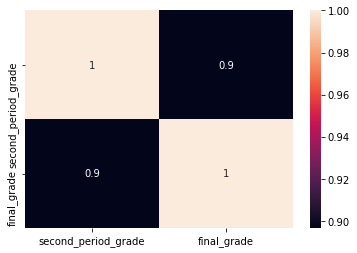

In [36]:
sns.heatmap(student_new_df.loc[:,['second_period_grade','final_grade']].corr(),annot=True)

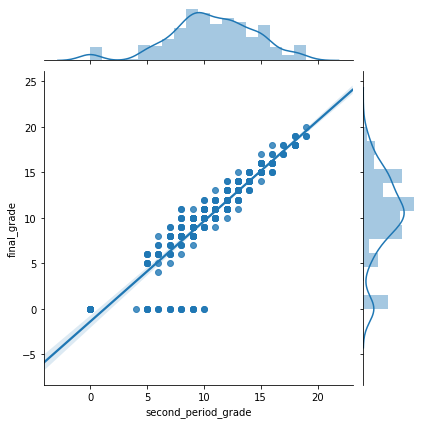

In [37]:
sns.jointplot(x='second_period_grade',y='final_grade',data=student_df,kind="reg")

## Observation: 
#### a) Second period grade (i.e. G2) and Final grade (i.e. G3) are positvly correlated columns, relationship is fairly strong and G2 will be significantly useful to predict G3
#### b) Correlation value for G2 and G3 is 0.9
#### c) Data distribution looks similar for these columns, distribution is bimodel for these because of grouping of data


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [38]:
student_df.groupby(['school']).count()

,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,...,family_quality,free_time,going_out,weekday_alcohol_consumption,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
school,,,,,,,,,,,,,,,,,,,,,
GP,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
MS,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


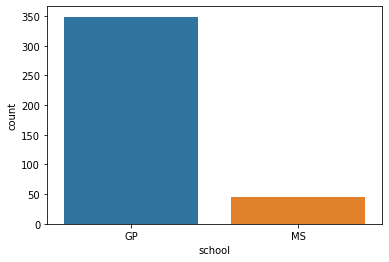

In [39]:
sns.countplot(student_df['school'])

## Observation:
#### a) number of students in school GP is ---> 349
#### b) number of students in school MS is ---> 46

In [40]:
student_df.groupby(['age']).count()

,school,sex,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,...,family_quality,free_time,going_out,weekday_alcohol_consumption,weekend_alcohol_consumption,health_status,#_of_absences,first_period_grade,second_period_grade,final_grade
age,,,,,,,,,,,,,,,,,,,,,
15,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
16,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
17,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
18,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
19,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
20,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


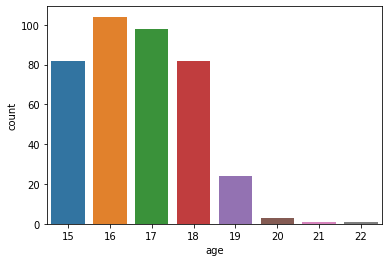

In [41]:
sns.countplot(student_df['age'])

## Observation:
#### a) number of students in age group 15 ---> 82
#### b) number of students in age group 16 ---> 104
#### c) number of students in age group 17 ---> 98
#### d) number of students in age group 18 ---> 82
#### e) number of students in age group 19 ---> 24
#### f) number of students in age group 20 ---> 3
#### g) number of students in age group 21 ---> 1
#### h) number of students in age group 22 ---> 1

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=1)

In [43]:
print('Original dataset ->', student_new_df.shape)
print('X_train ->', X_train.shape)
print('y_train ->', y_train.shape)
print('X_test ->', X_test.shape)
print('y_test ->', y_test.shape)

Original dataset -> (395, 28)
X_train -> (300, 27)
y_train -> (300,)
X_test -> (95, 27)
y_test -> (95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [44]:
model_LogR = LogisticRegression()

In [45]:
model_LogR.fit(X_train,y_train)

C:\Dist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
train_predict = model_LogR.predict(X_train)
test_predict = model_LogR.predict(X_test)

In [47]:
print('Model training score ->', model_LogR.score(X_train, y_train))
print('Model testing score ->', model_LogR.score(X_test, y_test))

Model training score -> 0.95
Model testing score -> 0.968421052631579


In [48]:
print('Model training accuracy score ->', metrics.accuracy_score(y_train, train_predict))
print('Model test accuracy score ->', metrics.accuracy_score(y_test, test_predict))

Model training accuracy score -> 0.95
Model test accuracy score -> 0.968421052631579


In [49]:
print(metrics.confusion_matrix(y_test, test_predict))

[[70  1]
 [ 2 22]]


#### True Negative: 70 ---> Actually Fail and predicted as Fail
#### True Positive: 22 ---> Actually Pass and predicted as Pass
#### False Negative: 2 ---> Actually Pass,but predicted as Fail. Type 2 error
#### False Positive: 1 ---> Actually Fail, but predicted as Pass. Type 1 error

In [51]:
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.96      0.92      0.94        24

    accuracy                           0.97        95
   macro avg       0.96      0.95      0.96        95
weighted avg       0.97      0.97      0.97        95



## Conclusion: Overall accurracy of this model is 96.84% with test dataset, which is significantly close to train accurracy 95%

#### a) Out of 71 failed students, 70 were predicted correctly and 1 was predicted pass

#### b) Out of 24 passed students, 22 were predicted correctly and 2 were predicted fail

# Naive bayes with Iris data

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features. 


### Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
 -- Iris Setosa 
 -- Iris Versicolour 
 -- Iris Virginica

### Import Iris.csv

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
iris_df = pd.read_csv('iris.csv')

In [54]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [55]:
iris_df.index.name = 'number'
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species'] 

In [56]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [57]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
number,,,,,
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [58]:
X=iris_df.copy()
y=X.pop('Species')

In [59]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
number,,,,
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y.head()

number
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Find the distribution of target variable (Class)

In [61]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
number,,,,,
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


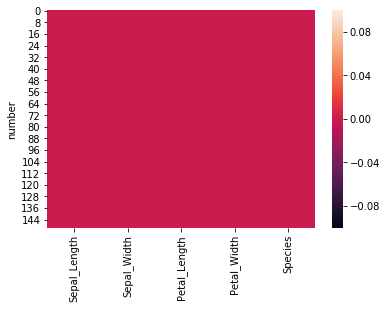

In [62]:
sns.heatmap(iris_df.isnull())

## Observation:
#### Dataset has no missing or null values

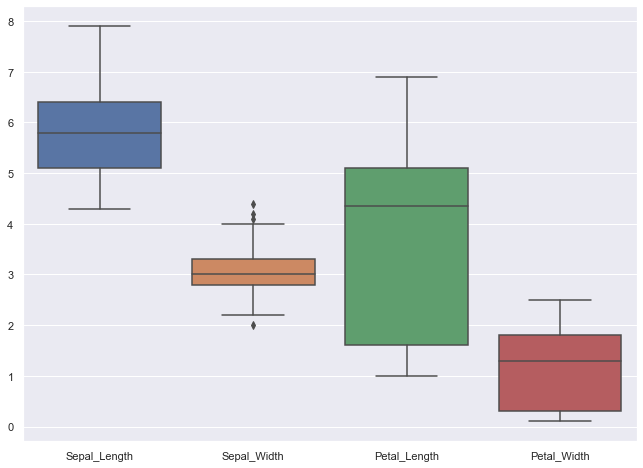

In [63]:
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,8)})
sns.boxplot(data=iris_df)

## Observation:
### BoxPlot for Sepal_Length - shows
##### a) data distribution is more symmetric, though tail looks skewed right (will verify this with distplot)
##### b) more data points are b/w Q3 and upper whisker
##### c) no outliers
### BoxPlot for Sepal_Width - shows
##### a) data distribution is more symmetric
##### b) High and low outliers are there
### BoxPlot for Petal_Length & Petal_Width - shows
##### a) data distribution b/w Q1 and Q3 looks left skewed, but tail looks skewed right (will verify this with distplot)
##### b) no outliers

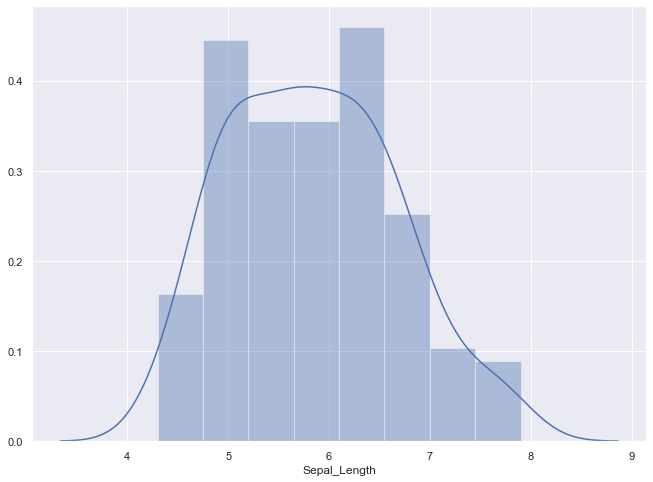

In [64]:
sns.distplot(iris_df['Sepal_Length'])

## Observation: 
#### data distribution for Sepal_Length is more symmetric

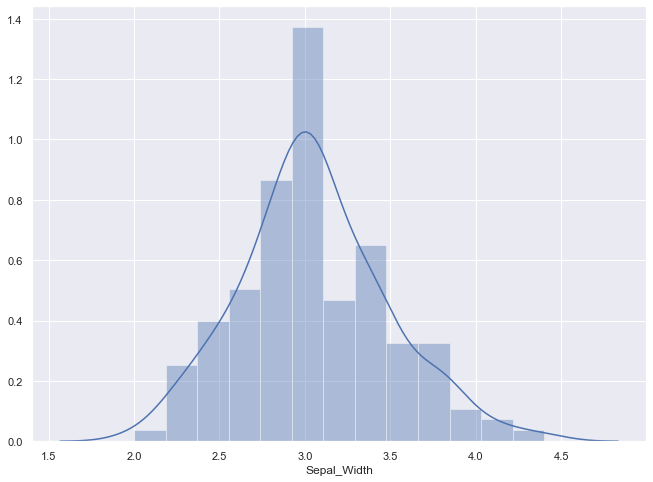

In [65]:
sns.distplot(iris_df['Sepal_Width'])

## Observation:
#### data distribution for Sepal_Width is more symmetric

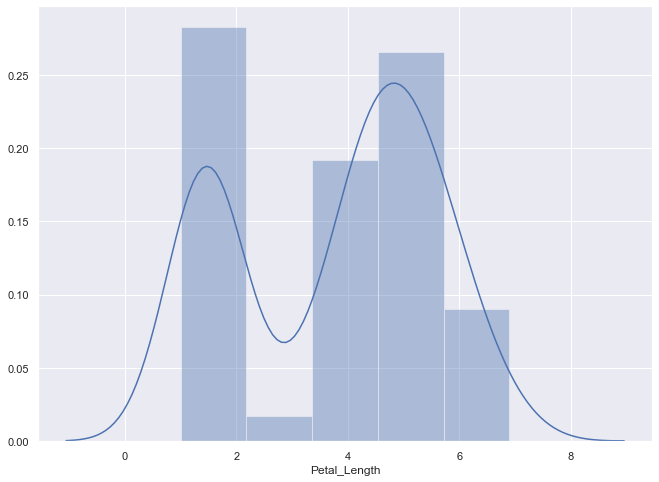

In [66]:
sns.distplot(iris_df['Petal_Length'])

## Observation: 
#### Bimodal distribution with 2 peaks for Petal_Length and look more symmetric. Data might be grouped into 2 groups (will verify this with Pair or Scatterplot)

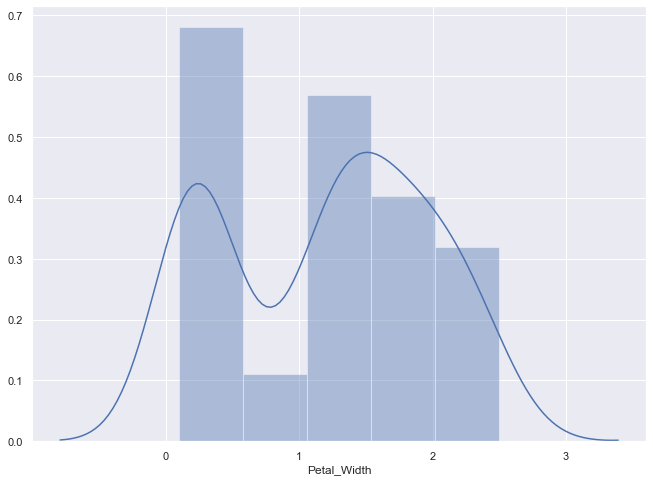

In [67]:
sns.distplot(iris_df['Petal_Width'])

## Observation: 
#### Bimodal distribution with 2 peaks for Petal_Width and look more symmetric. Data might be grouped into 2 groups (will verify this with Pair or Scatterplot)

### Plot the distribution of target variable using histogram

In [68]:
iris_df.shape

(150, 5)

In [69]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

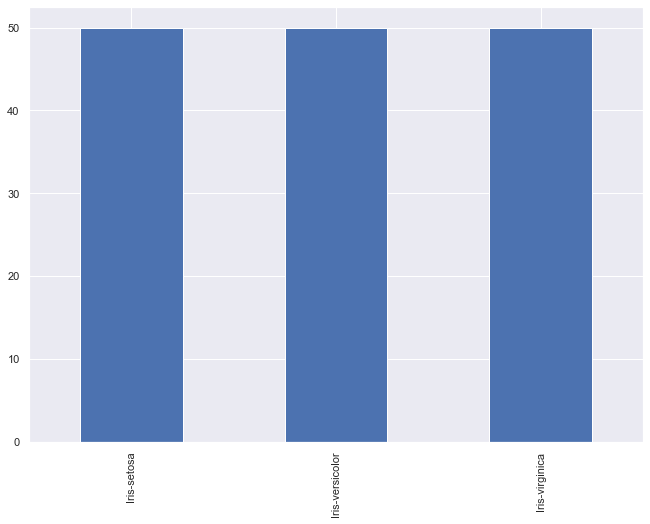

In [70]:
iris_df['Species'].value_counts().plot(kind='bar')

## Observation: 
#### 50 rows for each classes of target variable

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F6033D2E8>,
      dtype=object)

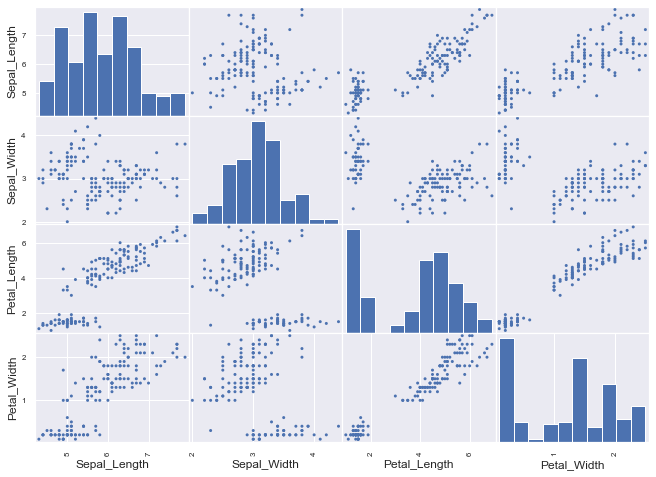

In [71]:
pd.plotting.scatter_matrix(iris_df, alpha=1.0)

C:\Dist\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


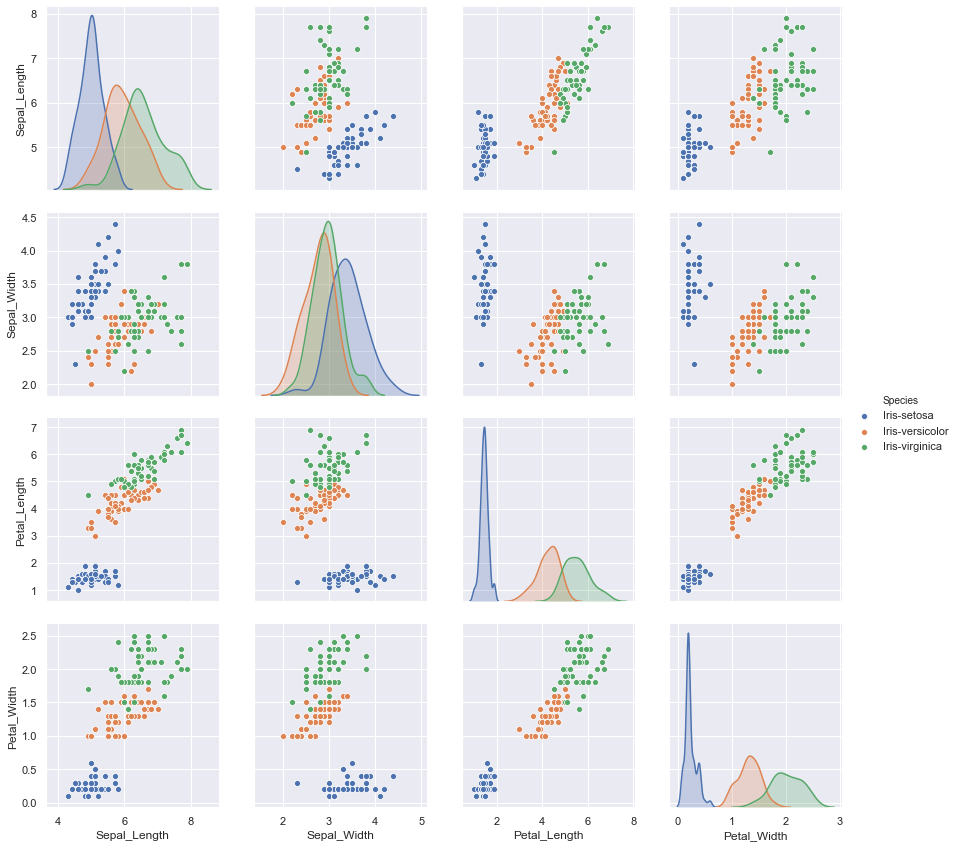

In [72]:
sns.pairplot(iris_df, hue="Species",size=3)

## Observation: 
#### a) Data points for Iris-setosas are clearly different from the other two species and also data points for Iris-Versicolors and Iris-Virginicas appears different, but see slightly overlapping along the border

#### b) This is why we see bimodel distribution for Petal_Length and Petal_Width

### Summary Statistics and explain insights for at least 2 variables

In [73]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal_Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal_Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Observation:
#### a) Mean and Median (50%) are almost same for Sepal_Length and Sepal_Width; we see same in boxplots for these variables, data distribution b/w Q1 and Q3 are symmetric.
#### b) Mean is less than Median (50%) for Petal_Length and Petal_Width; we see same in boxplots for these variables, data distribution b/w Q1 and Q3 is lefft skewed.
#### c) Variance is more for Petal_Length.
#### d) IQR is more for Petal_Length and Petal_Width, more data points are within IQR for these variables; we see same in boxplots for these.
#### e) By calculating lower and upper whiskers and comparing with min and max, only Sepal_Width (LW is 2.05 and UW is 4.05) is having outliers at both end.

### Correlation among all variables and give your insights

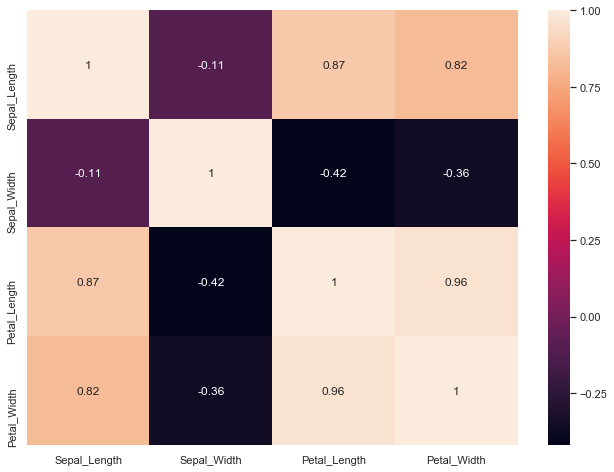

In [74]:
sns.heatmap(iris_df.corr(),annot=True)

## Observation: 
#### strong positive correlation b/w Sepal_Length, Petal_Length and Petal_Width

### Split data in Training and Validation in 80:20

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [76]:
print('Original dataset ->', iris_df.shape)
print('X_train ->', X_train.shape)
print('y_train ->', y_train.shape)
print('X_test ->', X_test.shape)
print('y_test ->', y_test.shape)

Original dataset -> (150, 5)
X_train -> (120, 4)
y_train -> (120,)
X_test -> (30, 4)
y_test -> (30,)


### Do Feature Scaling

In [77]:
X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
number,,,,
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [78]:
X_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
number,,,,
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
X_train[0:5,:]

array([[ 0.31553662, -0.03612186,  0.44748582,  0.2345312 ],
       [ 2.2449325 , -0.03612186,  1.29803965,  1.39642889],
       [-0.2873996 , -1.240184  ,  0.0505607 , -0.15276803],
       [ 0.67729835, -0.51774672,  1.01452171,  1.13822941],
       [-0.04622511, -0.51774672,  0.73100376,  1.52552864]])

In [82]:
X_test[0:5,:]

array([[-0.04622511,  2.3720024 , -1.48043619, -1.31466572],
       [-0.89033581, -1.240184  , -0.4597716 , -0.15276803],
       [ 0.91847283, -0.03612186,  0.33407864,  0.2345312 ],
       [-0.52857408,  2.13118998, -1.4237326 , -1.05646624],
       [ 2.48610699,  1.89037755,  1.46815041,  1.00912966]])

### Train and Fit NaiveBayes Model

In [83]:
model_NB = GaussianNB()

In [84]:
model_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
train_predict = model_NB.predict(X_train)

In [86]:
test_predict = model_NB.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [87]:
print('Model training score ->', model_NB.score(X_train, y_train))
print('Model testing score ->', model_NB.score(X_test, y_test))

Model training score -> 0.95
Model testing score -> 0.9666666666666667


In [88]:
print('Model training accuracy score ->', metrics.accuracy_score(y_train, train_predict))
print('Model testing accuracy score ->', metrics.accuracy_score(y_test, test_predict))

Model training accuracy score -> 0.95
Model testing accuracy score -> 0.9666666666666667


In [90]:
print(metrics.confusion_matrix(y_test, test_predict))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [91]:
print(metrics.classification_report(y_test, test_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Conclusion: Overall accurracy of this model is 96.67% with test dataset, which is significantly close to train accurracy 95%
#### a) All 11 Iris-Setosa were predicted correctly
#### b) Out of 13 Iris-Versicolor, 12 were predicted correctly and 1 was predicted as Iris-Virginica
#### c) All 6 Iris-Virginica were predicted correctly 